In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

df_pre = pd.read_csv('./dataset/studyset_2013_2017_fact12.csv', header=None)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:,0:11]
Y = dataset[:,11]

# 모델의 설정
model = Sequential()
model.add(Dense(30,  input_dim=11, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3200, batch_size=200, callbacks=[checkpointer])

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['acc']




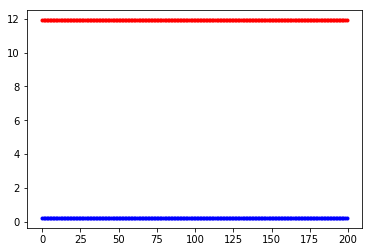

In [8]:
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

In [2]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

4325/4325 [==============================] - 0s 16us/step

 Accuracy: 0.2416
